# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soupy = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
row_data = soupy.find_all('tr', class_='data-row')
heading_data = soupy.find_all('th')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# # Create an empty list
heading_list = []
row_list = []

# Extract headings
for head in heading_data:
    title = head.text
    heading_list.append(title)

# Loop through the rows of data
for row in row_data:
    # Find all td elements within the row
    row_td = row.find_all('td')
    # Extract text from each td element and strip whitespace
    row_text = [td.text.strip() for td in row_td]
    # Append the row data to the row_list
    row_list.append(row_text)

# Display the extracted heading and row data
print(heading_list)
print(row_list)



['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

table_df = pd.DataFrame(row_list, columns = heading_list)



In [9]:
# Confirm DataFrame was created successfully
table_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
table_df['terrestrial_date']=pd.to_datetime(table_df['terrestrial_date'])
table_df['sol']=table_df['sol'].astype(int)
table_df['ls']=table_df['ls'].astype(int)
table_df['month']=table_df['month'].astype(int)
table_df['min_temp']=table_df['min_temp'].astype(float)
table_df['pressure']=table_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
len(table_df ["month"].unique())

table_df.groupby('month')['sol'].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
len(table_df ["sol"].unique())

1867

In [15]:
# 3. What is the average low temperature by month?
avg_temp = table_df.groupby('month')['min_temp'].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celcius')

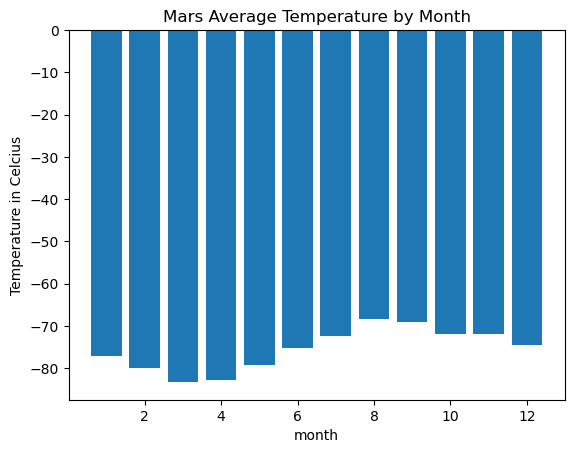

In [16]:
# Plot the average temperature by month

plt.bar(x=avg_temp.index, height=avg_temp)
plt.title('Mars Average Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')

Coldest month: 3
Hottest month: 8


<Axes: title={'center': 'Mars Coldest and Hottest months in Curiositys location'}, xlabel='month', ylabel='Temperature in Celcius'>

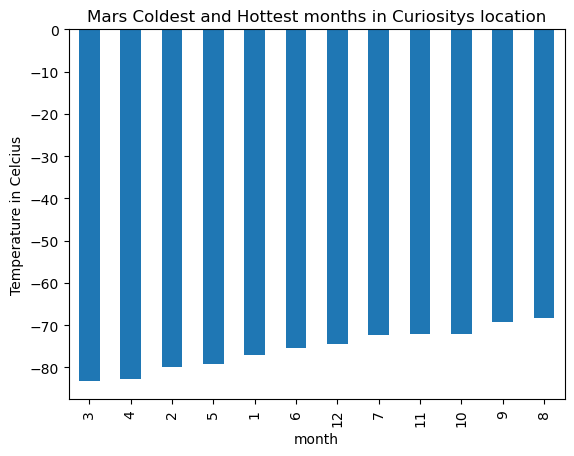

In [17]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_temp.idxmin()
hottest_month = avg_temp.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

# Sort the average temperature data in ascending order to prepare for the graph as shown in starter code
temp_order = avg_temp.sort_values()

# Plot the bar chart
# plt.bar(x=temp_order.index, height=temp_order)

plt.title('Mars Coldest and Hottest months in Curiositys location')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')

temp_order.plot.bar() 

# Using the plot.bar() function provided by Pandas directly because the Matplotlib's plt.bar() function cannot match the sample output of the starter code
# Looks like Matplotlib's plt.bar() cannot automatically match the index with the data when plotting 

In [18]:
# 4. Average pressure by Martian month
avg_pressure = table_df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


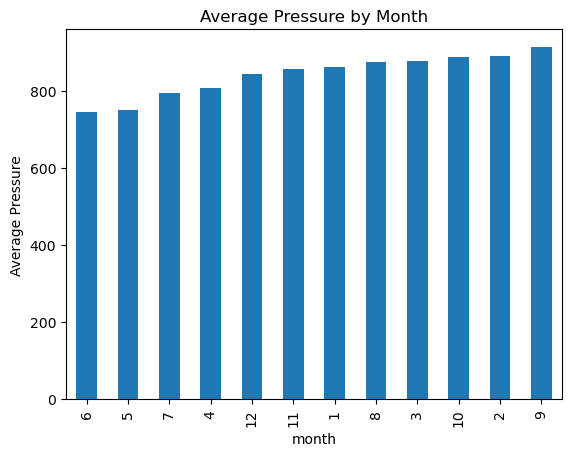

In [19]:
# Plot the average pressure by month
presure_order = avg_pressure.sort_values()
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
presure_order.plot.bar() 
plt.show()

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

##Consider how many days elapse on Earth in the time that Mars circles the Sun once.
##The solar longitude denotes the position of Mars in its orbit, running from Ls 0° to 360°
sun_zero=table_df.loc[table_df['ls']==0]
sun_zero


,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [21]:
date1 = datetime(2013, 8, 1)
date2 = datetime(2015, 6, 19)

# Calculate the number of days between the two dates
delta = date2 - date1
num_days = delta.days

print(f'it takes {num_days} Earth days for Mars to orbit the sun once.')

it takes 687 Earth days for Mars to orbit the sun once.


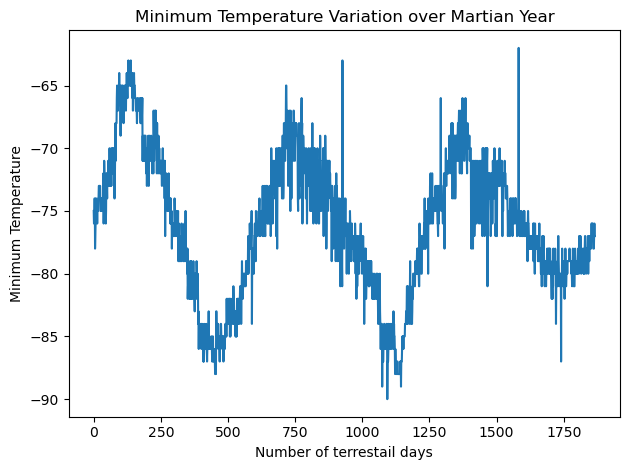

In [22]:

# Plotting the line plot
plt.plot(table_df['terrestrial_date'].index, table_df['min_temp'], linestyle='-')
plt.xlabel('Number of terrestail days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Variation over Martian Year')

plt.tight_layout() 
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
table_df.to_csv('mars_weather_data.csv', index=False)

In [24]:
browser.quit()